## Observations and Insights 

In [ ]:
Observations: Look across all previously generated figures and tables and write at least three observations or 
inferences that can be made from the data. Include these observations at the top of notebook.

1. Of the four specified drug regimens, Capomulin and Ramicane had the smallest average tumor volume 
and less variance, which would mean that they are the better treatment options over Infubinol and Ceftamin. 

2. When reviewing the Capomulin regimen, the correlation coefficient is 0.84. When you compate that weight of the mice 
with the average tumor volume, the heavier mice are more likely to have larger tumor volume. This would mean that 
this is a strong relationship between tumor volume and weight. 

3. When reviewing the gender, there are more male mice treated than female mice. The difference is very small 
(49.60% female vs. 50.40% male). Gender is not an important variables to consider here.

4. I used Mouse ID m957 to review how a mouse was treated by Capomulin. The tumor seemed to increase in volume 
only by a small amount at points 5 and 10, with a large drop then at point 45. I believe this aligns with the 
hypothesis that Capomulin is a strong drug regimen to reduce tumor growth.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how='outer')

# Display the data table for preview
study_data_df

In [11]:
# Checking the number of mice.
len(study_data_df['Mouse ID'].unique())

249

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_df.groupby(['Mouse ID', 'Timepoint']).count().sort_values(by=('Metastatic Sites'), ascending=False).head()

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     20                    2    2           2           2   
         15                    2    2           2           2   
         10                    2    2           2           2   
         5                     2    2           2           2   
         0                     2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     20                          2                 2  
         15                          2                 2  
         10                          2                 2  
         5                           2                 2  
         0                           2                 2

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
print(f"{len(study_data_df.loc[study_data_df['Mouse ID']=='g989'])} rows to delete")
study_data_df.loc[study_data_df['Mouse ID']=='g989'].head()

13 rows to delete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=study_data_df.loc[study_data_df['Mouse ID']!='g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_df=clean_df.groupby("Drug Regimen")
tumor_vol= drug_df['Tumor Volume (mm3)']

drug_stats=pd.DataFrame({
     "Mean": tumor_vol.mean(),
     "Median":tumor_vol.median(),
     "Variance": tumor_vol.var() ,
     "Std Deviation": tumor_vol.std(),
     "SEM": tumor_vol.sem()
})
drug_stats


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_agg_df=clean_df.groupby(["Drug Regimen"]).agg({
     "Tumor Volume (mm3)": ['mean','median','var','std','sem']
})
drug_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = clean_df['Drug Regimen'].value_counts()

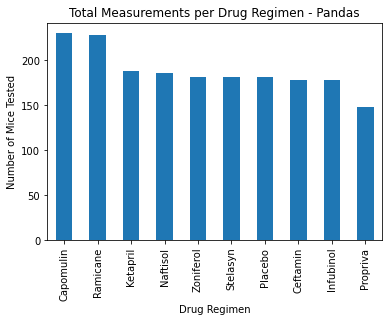

In [20]:
counts.plot(kind="bar")
plt.title("Total Measurements per Drug Regimen - Pandas")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

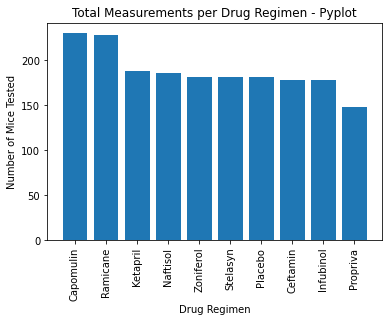

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = clean_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.title("Total Measurements per Drug Regimen - Pyplot")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_group=clean_df[['Mouse ID','Sex']].groupby(['Sex']).count()
gender_group=gender_group.rename(columns={'Mouse ID':'Count'})
sex=gender_group.index

gender_group

,Count
Sex,
Female,922
Male,958


Text(0, 0.5, 'Sex')

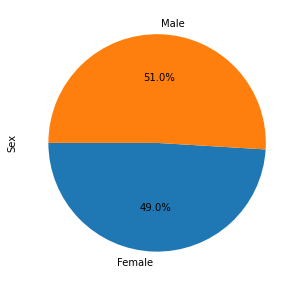

In [23]:
pie_pd=gender_group['Count'].plot(kind="pie",autopct='%1.1f%%', figsize=(7,5),  startangle=180)
pie_pd.set_ylabel("Sex")                   

Text(0, 0.5, 'Sex')

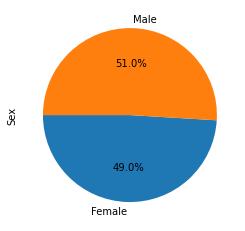

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_group['Count'],labels=sex, autopct='%1.1f%%', startangle=180)
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_value = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor_value = max_tumor_value.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor_value.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")

In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset
    final_tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq  
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
  
    print(f"{drug} Regimen")
    print(f"The lower quartile of {drug} tumors: {lowerq}")
    print(f"The upper quartile of {drug} tumors: {upperq}")
    print(f"The interquartile range of {drug} tumors: {iqr}")
    print('-------------------------------------------------')

Capomulin Regimen
The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
-------------------------------------------------
Ramicane Regimen
The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
-------------------------------------------------
Infubinol Regimen
The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
-------------------------------------------------
Ceftamin Regimen
The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
-------------------------------------------------


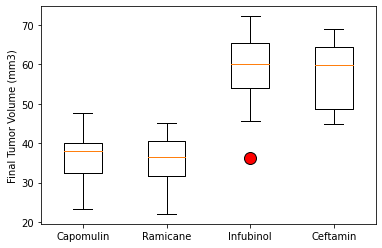

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = dict(markerfacecolor='red',markersize=12)
plt.boxplot(final_tumor_vol_list, labels = treatments,flierprops=box_plot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "m957",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]
forline_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
135,m957,Capomulin,Female,3,19,0,45.000000,0
136,m957,Capomulin,Female,3,19,5,45.622381,1
137,m957,Capomulin,Female,3,19,10,46.414518,1
138,m957,Capomulin,Female,3,19,15,39.804453,1
139,m957,Capomulin,Female,3,19,20,38.909349,1
140,m957,Capomulin,Female,3,19,25,37.695432,1
141,m957,Capomulin,Female,3,19,30,38.212479,1
142,m957,Capomulin,Female,3,19,35,32.562839,1
143,m957,Capomulin,Female,3,19,40,32.947615,1
144,m957,Capomulin,Female,3,19,45,33.329098,1


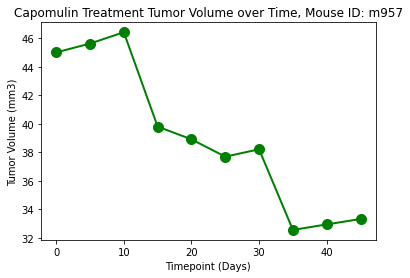

In [30]:
plt.title('Capomulin Treatment Tumor Volume over Time, Mouse ID: m957')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=10,marker="o",color="green")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()
avg_capm_vol

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


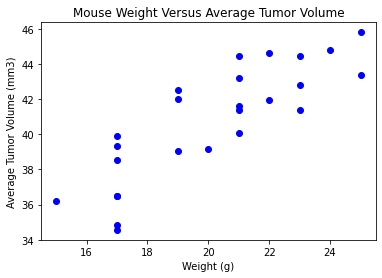

In [32]:
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


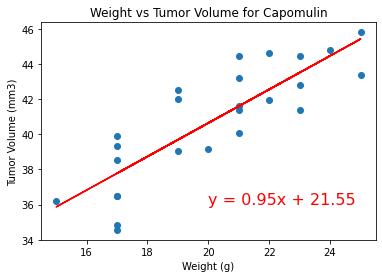

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])
regress_values = avg_capm_vol['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])
plt.plot(avg_capm_vol['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=16,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()